<a href="https://colab.research.google.com/github/KJM94/pyd/blob/main/ch3_3_2_random_signoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch3.2 - 난수 생성 및 시그모이드 함수"
date: 2020-04-05T11:20:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch3.2 - 난수 생성 및 시그모이드 함수
---

## 공지

- 본 Tutorial은 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 
- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 
- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 

## I. 퍼셉트론의 한계 극복

`AI`는 과거부터 존재하였지만, 여러가지 한계로 인해 연구의 흥망성쇠가 계속적으로 있어왔다. 퍼셉트론의 한계를 지적하는 데 사용됐던, `AND`, `OR`, `XOR` 연산을 할 수 있는 신경망 네트워크를 직접 만들어보자. 

## II. 난수(Random Number) 생성
신경망을 쉽게 정의하면, 많은 숫자로 구성된 행렬의 의미를 가진다. 행렬을 구성하는 숫자는 처음에 `Random`으로 지정해주어야 하기 때문에 이러한 작업을 초기화(`Initialization`)이라 한다. 대중적으로 많이 쓰이는 방법은 `Xavier 초기화(Xavier Initialization)`, `He 초기화(He Initialization)`가 있다. 이제 난수를 생성해보자. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.8967699], shape=(1,), dtype=float32)


`tf.random.uniform` 함수는 일종의 균일 분포(uniform distribution)의 난수를 얻을 수 있다. 균일분포의 뜻이란, 정해진 최소값과 최대값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는다는 뜻을 의미한다. 
- `[1]`: 은 결과값의 `Shape`를 의미하는데, 일종의 행, 열 등 차원의 수를 나타내는 값이다. 
- `0`: 최소값 0을 의미한다. 
- `1`: 최대값 1을 의미한다. 

`shape`를 바꿔서 여러 개의 난수를 얻을 수 있다.



In [ ]:
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.81561625 0.39635897 0.45017135 0.5549017 ], shape=(4,), dtype=float32)


정규(normal) 분포를 통해서 난수를 얻을 수 있다. 정규 분포는 가운데가 높고 양극단으로 갈수록 낮아져서 종 모양을 그리는 분포를 말한다. 정규 분포의 난수를 구하기 위해서는 `tf.random.uniform`을 `tf.random.normal`로 바꾸기만 하면 된다. 

In [ ]:
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([ 0.91247237  0.5765699  -0.11374369  1.1140796 ], shape=(4,), dtype=float32)


1 이상의 값도 나올 수 있고, 음수가 나올 수도 있는데, 여기서 두번째의 0은 정규분포의 평균을 말하고, 세번째의 1은 정규분포의 표준편차를 의미한다. 아래 소스코드를 통해서 균일분포와 정규분포의 차이점을 이해하기 바란다. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


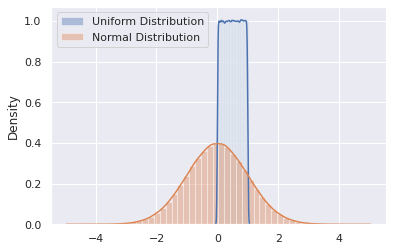

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore", UserWarning)

# Let's create an array of random numbers from uniform distribution
uniform = np.random.uniform(0,1,1000000)

# Let's create an array of random numbers from normal distribution
normal = np.random.normal(0,1,1000000)

# Let's plot them
ax = sns.distplot(uniform, label='Uniform Distribution')
bx = sns.distplot(normal, label= 'Normal Distribution')
legend = plt.legend()
plt.show()

균일 분포와 정규 분포에 대해 각 100만개의 샘플을 구해서 히스토그램으로 나타내면 균일 분포는 최소값 0과 최대값 1 사이에서 균일하게 나타나지만, 정규분포는 평균 0을 기준으로 종형 곡선 (bell curve)를 그리게 되는 것을 확인할 수 있다. 

정규 분포는 실생활에서 자주 볼 수 있는 분포 형태이며, 앞에서 소개한 Xavier 초기화나 He 초기화는 균일 분포와 정규 분포 중 하나를 택해서 신경망의 초기값을 만든다. 

## III. 뉴런 만들기
신경망의 가장 기본적인 구성요소인 뉴런을 만들어본다. 뉴런은 입력, 가중치, 활성화함수, 출력 등으로 구성된다. 뉴런에 대한 그림 설명은 본 교재 Page 40-41를 참고한다. 

과거에는 뉴런을 퍼셉트론이라고 불렀으며, 입력을 받아서 계산 후 출력을 반환하는 단순한 구조였지만, 신경망은 이러한 뉴런이 여러 개가 모여 레이어(layer)를 구성한 후, 이 레이어가 다시 모여 구성된 형태를 띈다. 

이 때의 뉴런은, `입력`, `가중치`, `활성화함수`, `출력`등으로 구성된다. `입력`, `가중치`, `출력`은 보통 `정수(integer)`나 앞에서 살펴본 `float` 등이 많이 사용된다. 활성화함수는 뉴런의 출력값을 정하는 함수이며, 가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤 활성화함수를 취하면 출력을 얻을 수 있다. 

뉴런에서 학습할 때 변하는 것은 `가중치`이다. 가중치는 처음에는 초기화를 통해 랜덤한 값을 넣고, 학습 과정에서 점차 일정한 값으로 수렴한다. **학습이 잘된다는 뜻의 의미는 좋은 가중치를 얻어서 원하는 출력값에 근접했다는 것을 의미**한다. 

이 때, 활성화함수가 사용되는데, `시그모이드(sigmoid)`, `ReLU` 등을 주로 쓰게 된다. 결론부터 말하면, 현재에는 시그모이드보다는 ReLU가 더 많이 쓰인다. 

## (1) 시그모이드(sigmoid)
시그모이드는 출력값을 0~1 사이로만 제한하지만, ReLU는 양수를 그대로 반환하기 때문에 값의 왜곡이 적어진다. 

시그모이드 함수를 파이썬으로 구현해보자. 먼저 `sigmoid()` 구현한뒤 입력이 1일 때 기대출력이 0이 되는 뉴런을 만들어본다. 


In [ ]:
import math
def sigmoid(x): 
  return 1 / (1 + math.exp(-x))

In [ ]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.4023056792080975


각각의 코드에 대한 설명은 아래와 같다. 
- `x`는 입력값을 의미
- `y`는 출력의 기대값을 의미 
- `w`는 가중치로써, 정규분포의 랜덤한 값을 넣는다.
- `output`은 sigmoid() 함수에 입력과 가중치를 곱한 값을 넣어서 계산함


In [ ]:
error = y - output
print(error)

-0.4023056792080975


실제 출력으로 나온 값은 `0.25820436275087716`이므로, 기대했던 0과는 오차가 발생함을 알 수가 있다. 여기서 뉴런이란 결국 `w(즉, 가중치)`값이며, 이제 이 가중치에 변화를 주어야 합니다. 대표적으로 가중치에 변화를 주는 것이 경사 하강법이며, 이것은 `w(가중치)`에 입력과 학습률(a)과 에러를 곱한 값을 더해주는 것이다. 학습률은 `가중치(w)`를 업데이트 하는 정도로 생각하면 된다.[^1]

w = w + x * a * error

경사 하강법이 효과를 발휘하는지 코드로 확인해보자. 

[^1]: 경사는 손실 곡선의 기울기를 의미하며, 자세한 설명은 구글 머신러닝 단기집중과정의 <<손실 줄이기: 경사하강법>>에서 확인한다. https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent?hl=ko


In [ ]:
for i in range(10000): 
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 -0.09439938620482959 0.09439938620482959
199 -0.050139005255021706 0.050139005255021706
299 -0.03383640392827357 0.03383640392827357
399 -0.0254613675766714 0.0254613675766714
499 -0.02038375882215911 0.02038375882215911
599 -0.016983160293095628 0.016983160293095628
699 -0.014549150636431155 0.014549150636431155
799 -0.012722145201506151 0.012722145201506151
899 -0.011300842743774223 0.011300842743774223
999 -0.010163923408012155 0.010163923408012155
1099 -0.009234042102624176 0.009234042102624176
1199 -0.0084594465438726 0.0084594465438726
1299 -0.007804338014348442 0.007804338014348442
1399 -0.007243107911190213 0.007243107911190213
1499 -0.0067569637433159855 0.0067569637433159855
1599 -0.006331786474522005 0.006331786474522005
1699 -0.00595682057990128 0.00595682057990128
1799 -0.005623672330819759 0.005623672330819759
1899 -0.005325732390008055 0.005325732390008055
1999 -0.00505770389652977 0.00505770389652977
2099 -0.0048152907241448065 0.0048152907241448065
2199 -0.004595012

기대값 0에 가까우려면 i = 99 보다는 i = 999가 더 0에 가까워지는 것을 확인할 수 있다. 


## IV. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.